In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

bike_sharing = pd.read_csv('Bike Sharing Data.csv')
df = pd.DataFrame(bike_sharing)

In [2]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
print(df.shape)

(10886, 12)


1.data preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
# Whether data is duplicated
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [datetime, season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, count]
Index: []


In [7]:
print(df['weather'].value_counts())

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


In [8]:
print(df[bike_sharing['weather'] == 4]['count'])

5631    164
Name: count, dtype: int64


In [9]:
df = df[df['weather'] != 4]
print(df['weather'].value_counts())

weather
1    7192
2    2834
3     859
Name: count, dtype: int64


In [10]:
df['datetime'] = pd.to_datetime(bike_sharing['datetime'])

features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count']

subset = df[features]
correlation_matrix = subset.corr()

correlation_with_count = correlation_matrix['count'].sort_values(ascending=False)

print("relevance ranking:")
print(correlation_with_count)


relevance ranking:
count         1.000000
temp          0.394476
atemp         0.389802
season        0.163434
windspeed     0.101361
workingday    0.011604
holiday      -0.005395
weather      -0.128696
humidity     -0.317377
Name: count, dtype: float64


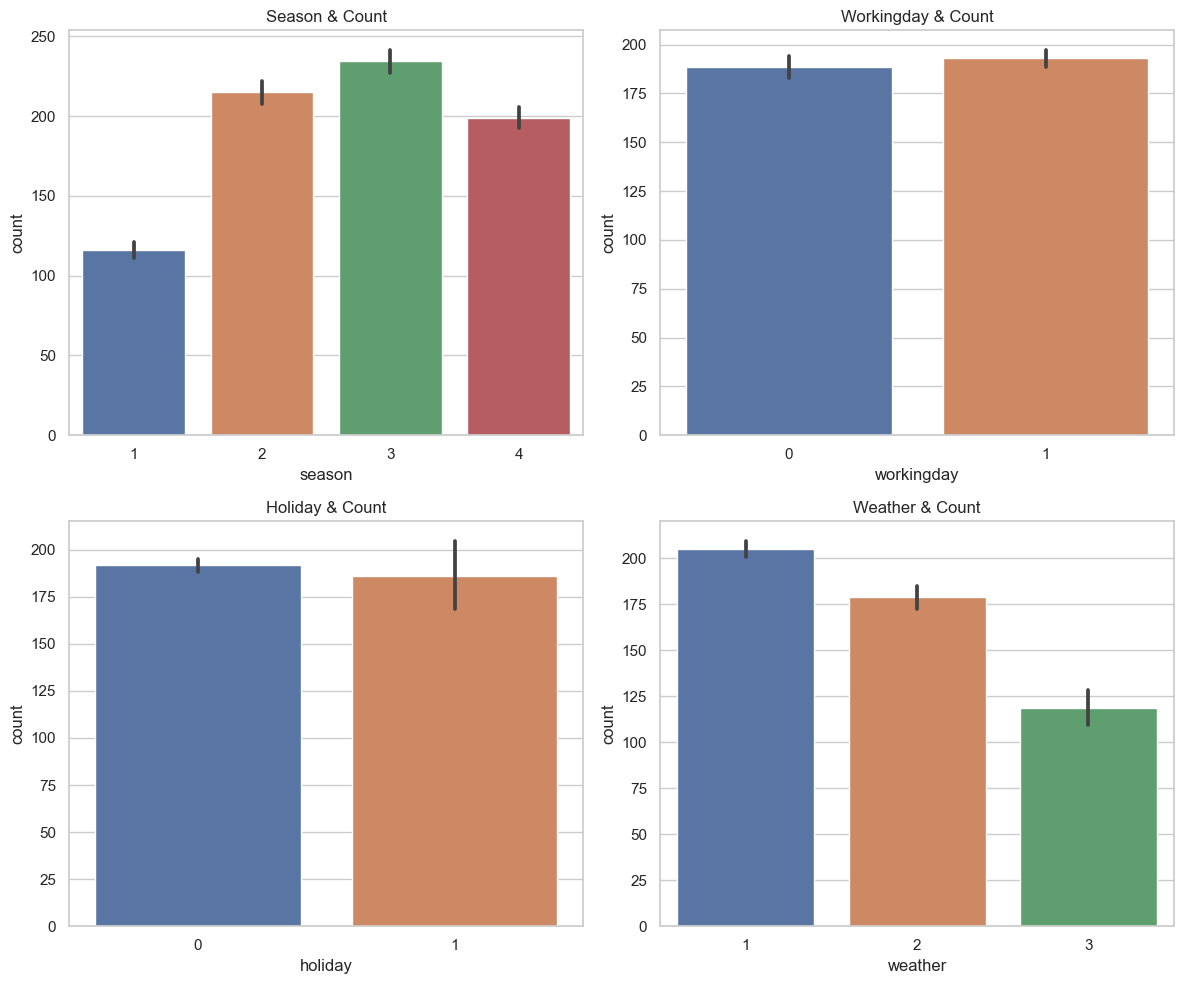

In [11]:
df['hour'] = df['datetime'].dt.hour

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.barplot(x='season', y='count', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Season & Count')

sns.barplot(x='workingday', y='count', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Workingday & Count')

sns.barplot(x='holiday', y='count', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Holiday & Count')

sns.barplot(x='weather', y='count', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Weather & Count')

plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9312\1218582575.py:8: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.lineplot(x='hour', y='count', hue='weather', data=df, errorbar=None, palette=custom_palette['weather'])


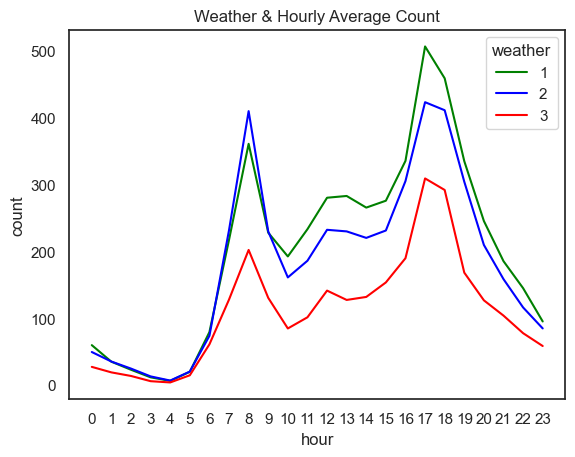

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

custom_palette = {'weather': ['green', 'blue', 'red','yellow']}

sns.lineplot(x='hour', y='count', hue='weather', data=df, errorbar=None, palette=custom_palette['weather'])
plt.title('Weather & Hourly Average Count')
plt.xticks(range(24))  
plt.show()


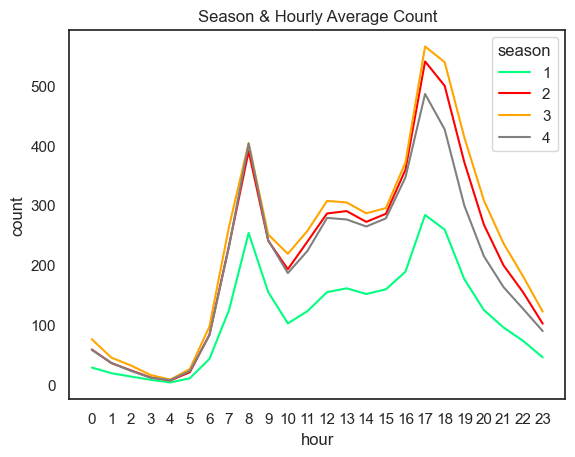

In [13]:
custom_palette = {'season': ['springgreen', 'red', 'orange', 'grey']}

sns.lineplot(x='hour', y='count', hue='season', data=df, errorbar=None, palette=custom_palette['season'])
plt.title('Season & Hourly Average Count')
plt.xticks(range(24))  
plt.show()


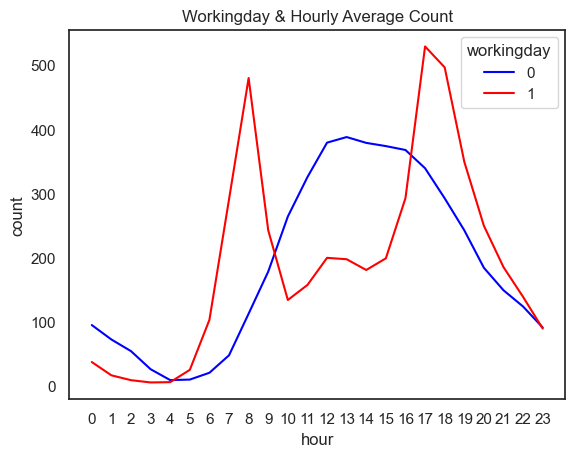

In [14]:
custom_palette = {'workingday': ['blue', 'red']}

sns.lineplot(x='hour', y='count', hue='workingday', data=df, errorbar=None, palette=custom_palette['workingday'])
plt.title('Workingday & Hourly Average Count')
plt.xticks(range(24)) 
plt.show()

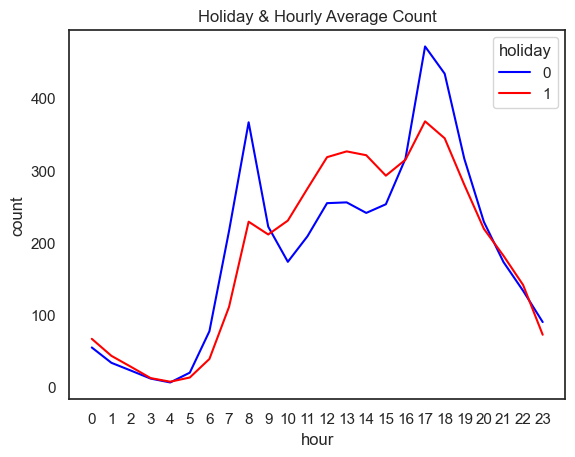

In [15]:
custom_palette = {'holiday': ['blue', 'red']}

sns.lineplot(x='hour', y='count', hue='holiday', data=df, errorbar=None, palette=custom_palette['holiday'])
plt.title('Holiday & Hourly Average Count')
plt.xticks(range(24)) 
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['season', 'weather', 'workingday', 'holiday']
target = 'count'

X = bike_sharing[features]
y = bike_sharing[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

y_train_pred = tree_model.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared(train): {r2_train}')
print(f'R-squared(test): {r2_test}')


Mean Squared Error: 29999.770778110855
R-squared(train): 0.08158796128861523
R-squared(test): 0.0911070660791361


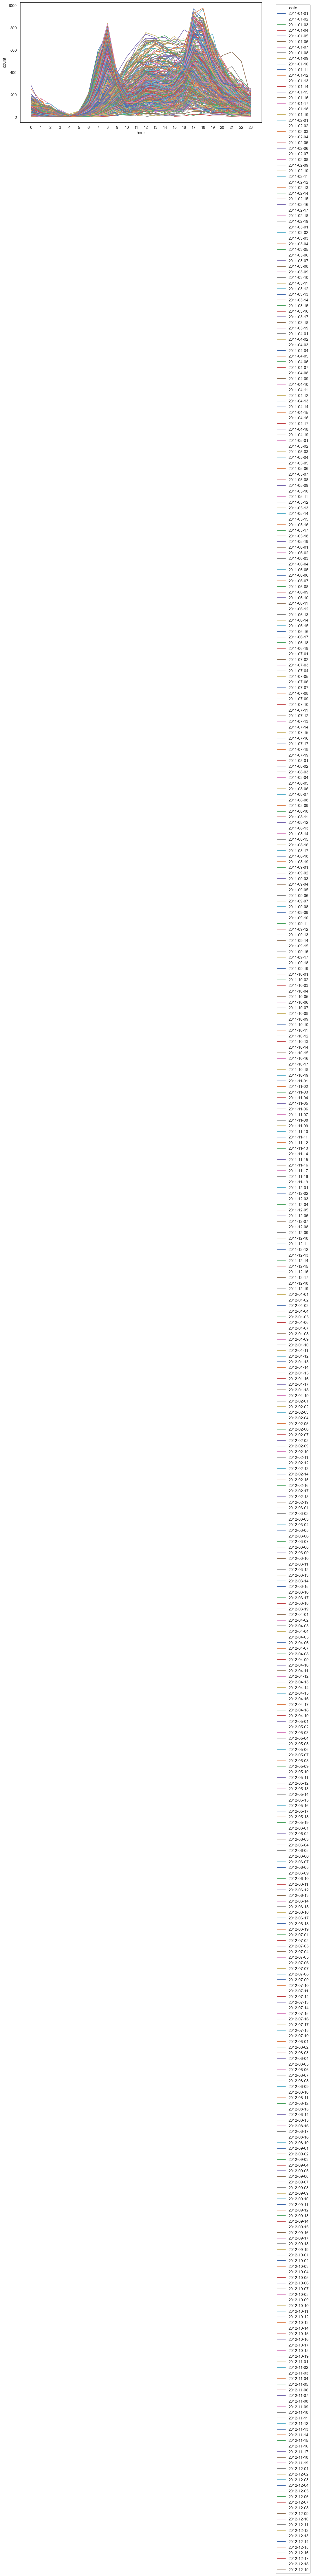

In [17]:
bike_sharing['datetime'] = pd.to_datetime(bike_sharing['datetime'])

# Extract the date and hour as the new column
bike_sharing['date'] = bike_sharing['datetime'].dt.date
bike_sharing['hour'] = bike_sharing['datetime'].dt.hour

# Draw a line chart for each hour
plt.figure(figsize=(12, 6))
for day in bike_sharing['date'].unique():

    oneDay = bike_sharing['date'] == day
    day_data = bike_sharing[oneDay]

    plt.plot(day_data['hour'], day_data['count'], label=str(day))

plt.xlabel('hour')
plt.ylabel('count')
plt.legend(title='date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(24))
plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

bike_sharing['datetime'] = pd.to_datetime(bike_sharing['datetime'])


bike_sharing['hour'] = bike_sharing['datetime'].dt.hour


features = ['season', 'weather', 'workingday', 'holiday', 'hour']
target = 'count'

X = bike_sharing[features]
y = bike_sharing[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)


y_train_pred = tree_model.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared(train): {r2_train}')
print(f'R-squared(test): {r2_test}')


Mean Squared Error: 7710.865687677271
R-squared(train): 0.8044315976860694
R-squared(test): 0.7663865037576783


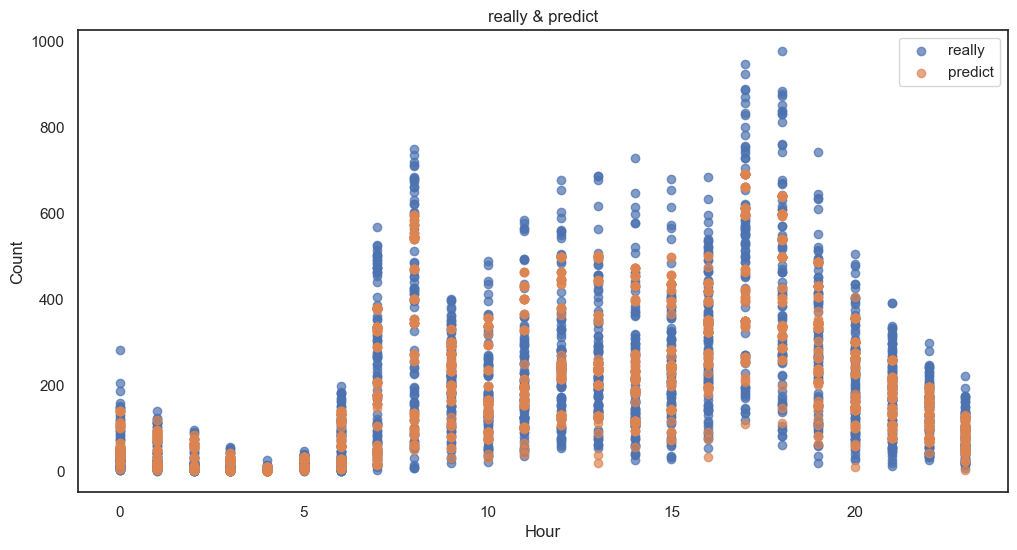

In [19]:

df_results = pd.DataFrame({'hour': X_test['hour'], 'y_test': y_test, 'y_pred': y_pred})

plt.figure(figsize=(12, 6))
plt.scatter(df_results['hour'], df_results['y_test'], label='really', alpha=0.7)
plt.scatter(df_results['hour'], df_results['y_pred'], label='predict', alpha=0.7)

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('really & predict')
plt.legend()
plt.show()



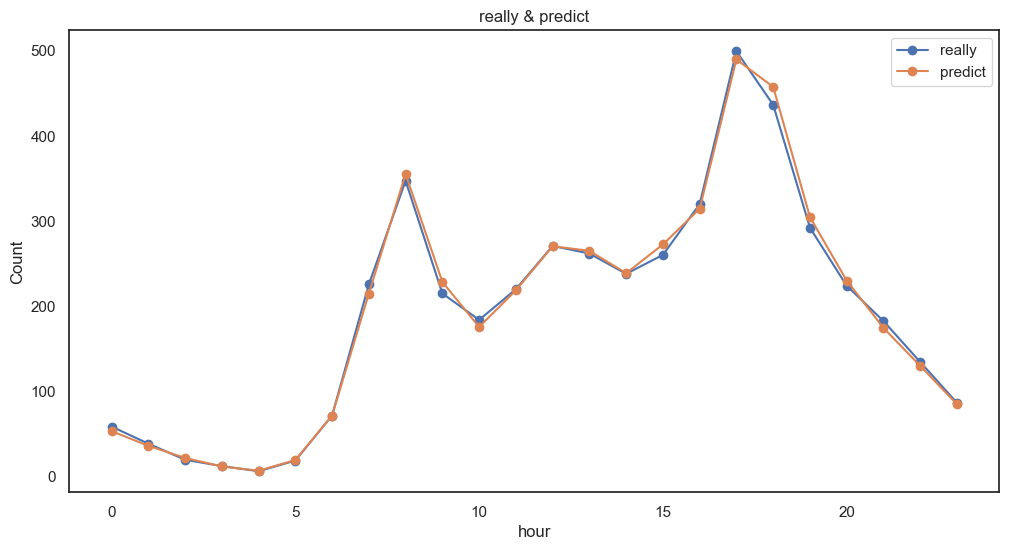

In [20]:
import numpy as np

df_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
df_results['hour'] = X_test['hour']

hourly_avg = df_results.groupby('hour').mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_avg['hour'], hourly_avg['y_test'], label='really', marker='o')
plt.plot(hourly_avg['hour'], hourly_avg['y_pred'], label='predict', marker='o')

plt.xlabel('hour')
plt.ylabel('Count')
plt.title('really & predict')
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

bike_sharing['datetime'] = pd.to_datetime(bike_sharing['datetime'])

bike_sharing['hour'] = bike_sharing['datetime'].dt.hour

features = ['season', 'weather', 'workingday', 'holiday', 'hour']
target = 'count'

X = bike_sharing[features]
y = bike_sharing[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor()

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

best_tree_model = grid_search.best_estimator_
y_pred = best_tree_model.predict(X_test)

y_train_pred = best_tree_model.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared(train): {r2_train}')
print(f'R-squared(test): {r2_test}')



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error: 7372.4503862131505
R-squared(train): 0.7923361933694641
R-squared(test): 0.7766393579713465


Mean Squared Error: 22176.279119546703
R-squared(train): 0.31753811269475984
R-squared(test): 0.32813275336358916


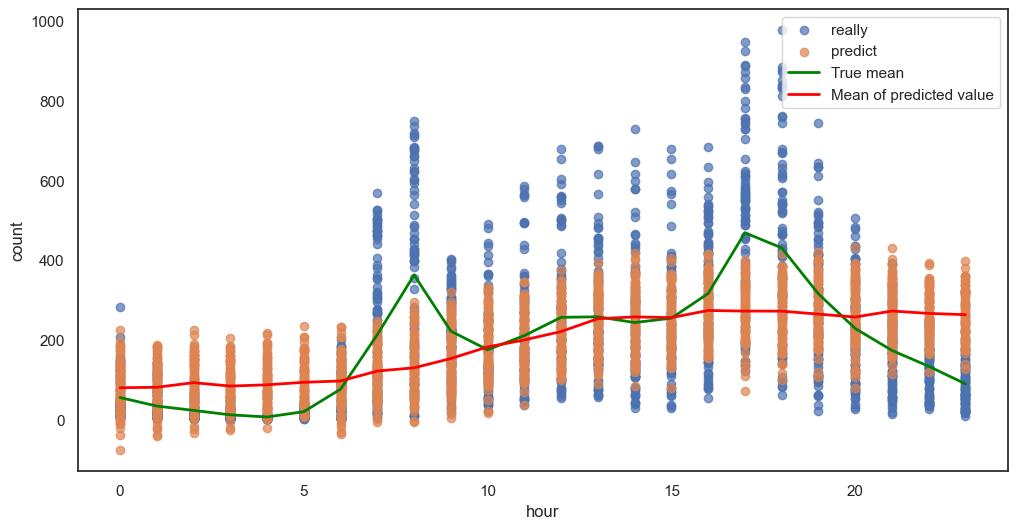

In [22]:
bike_sharing['datetime'] = pd.to_datetime(bike_sharing['datetime'])

bike_sharing['hour'] = bike_sharing['datetime'].dt.hour

features = ['temp', 'atemp', 'humidity', 'hour']
target = 'count'

X = bike_sharing[features]
y = bike_sharing[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared(train): {r2_train}')
print(f'R-squared(test): {r2_test}')

hourly_average = bike_sharing.groupby('hour')['count'].mean()

X_test['y_pred'] = y_pred

hourly_pred_average = X_test.groupby('hour')['y_pred'].mean()

plt.figure(figsize=(12, 6))

plt.scatter(X_test['hour'], y_test, label='really', alpha=0.7)
plt.scatter(X_test['hour'], y_pred, label='predict', alpha=0.7)

plt.plot(hourly_average.index, hourly_average.values, label='True mean', color='green', linewidth=2)
plt.plot(hourly_pred_average.index, hourly_pred_average.values, label='Mean of predicted value', color='red', linewidth=2)

plt.xlabel('hour')
plt.ylabel('count')
plt.legend()
plt.show()



Mean Squared Error: 14745.278955484924
R-squared(train): 0.5530854741213407
R-squared(test): 0.5532672582581577
               Feature   Coefficient
0                    1 -5.294035e-05
1                 temp  3.535664e+02
2                atemp -5.648745e+02
3             humidity -1.333529e+02
4                 hour -8.607433e+01
..                 ...           ...
121    humidity^4 hour -3.393042e-07
122  humidity^3 hour^2  3.084023e-06
123  humidity^2 hour^3  1.148672e-05
124    humidity hour^4  4.583195e-04
125             hour^5 -2.748988e-03

[126 rows x 2 columns]


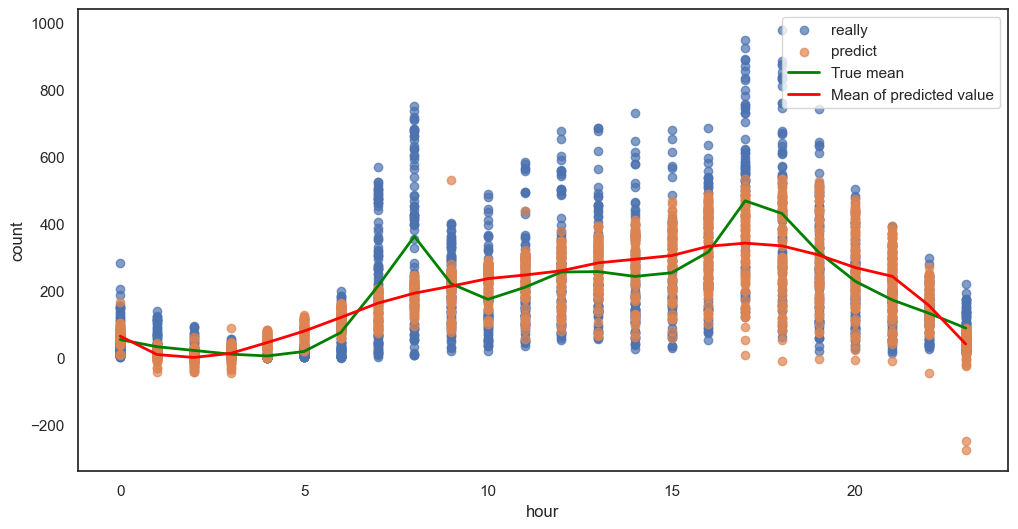

In [23]:
features = ['temp', 'atemp', 'humidity', 'hour']
target = 'count'

X = bike_sharing[features]
y = bike_sharing[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 5
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

y_train_pred = model.predict(X_train_poly)

mse = mean_squared_error(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared(train): {r2_train}')
print(f'R-squared(test): {r2_test}')

poly_feature_names = poly.get_feature_names_out(features)
coefficients = pd.DataFrame({'Feature': poly_feature_names, 'Coefficient': model.coef_})
print(coefficients)

hourly_average = bike_sharing.groupby('hour')['count'].mean()

X_test['y_pred'] = y_pred

hourly_pred_average = X_test.groupby('hour')['y_pred'].mean()

plt.figure(figsize=(12, 6))

plt.scatter(X_test['hour'], y_test, label='really', alpha=0.7)
plt.scatter(X_test['hour'], y_pred, label='predict', alpha=0.7)

plt.plot(hourly_average.index, hourly_average.values, label='True mean', color='green', linewidth=2)
plt.plot(hourly_pred_average.index, hourly_pred_average.values, label='Mean of predicted value', color='red', linewidth=2)

plt.xlabel('hour')
plt.ylabel('count')
plt.legend()
plt.show()





In [24]:
features = ['temp', 'atemp', 'humidity', 'hour']
target = 'count'

X = bike_sharing[features]
y = bike_sharing[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


for degree in [2, 5, 10]:
    
    
    poly = PolynomialFeatures(degree)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()

    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    y_train_pred = model.predict(X_train_poly)

    mse = mean_squared_error(y_test, y_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_pred)

    print(f'\nDegree = {degree}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared(train): {r2_train}')
    print(f'R-squared(test): {r2_test}')



Degree = 2
Mean Squared Error: 17611.984542755254
R-squared(train): 0.4570141341715822
R-squared(test): 0.46641564625175624

Degree = 5
Mean Squared Error: 14745.278955484924
R-squared(train): 0.5530854741213407
R-squared(test): 0.5532672582581577

Degree = 10
Mean Squared Error: 6788924287.724807
R-squared(train): 0.6475801087343255
R-squared(test): -205680.74869319363


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


            casual  registered       temp   humidity  windspeed    season  \
cluster                                                                     
0        12.191563   85.092440  17.149678  68.081582  11.826038  2.389809   
1        82.268233  292.264722  26.212534  49.859535  14.689839  2.733657   

          holiday  workingday   weather  
cluster                                  
0        0.027844    0.686900  1.526382  
1        0.029984    0.669098  1.208266  
Silhouette Coefficient: 0.1780300124100858


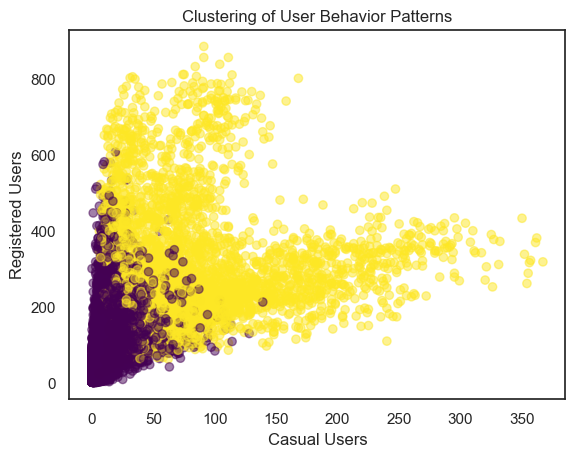

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features_for_clustering = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'casual', 'registered']]

scaler = StandardScaler()
features_for_clustering_scaled = scaler.fit_transform(features_for_clustering)

num_clusters = 2  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(features_for_clustering_scaled)

cluster_stats = df.groupby('cluster')[['casual', 'registered', 'temp', 'humidity', 'windspeed','season', 'holiday', 'workingday', 'weather']].mean()
print(cluster_stats)

silhouette_avg = silhouette_score(features_for_clustering_scaled, df['cluster'])
print(f"Silhouette Coefficient: {silhouette_avg}")

plt.scatter(df['casual'], df['registered'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Casual Users')
plt.ylabel('Registered Users')
plt.title('Clustering of User Behavior Patterns')
plt.show()
